# Distribution Based Clustering (Flat/Partitional)

Distribution-based clustering assumes data is generated from a mixture of probability distributions, usually Gaussian. Each cluster represents a distribution, and points are assigned based on the highest probability of belonging. It's good for well-separated, statistically modeled clusters but less effective with irregular shapes.

### GMM (Gaussian Mixture Model)

Assumes that data is generated from a mix of several Gaussian (normal) distributions. Each cluster is a Gaussian defined by a mean and variance. GMM uses the Expectation-Maximization (EM) algorithm to estimate the parameters and assigns points to clusters based on probabilities, allowing soft assignments (a point can belong to multiple clusters with different probabilities).

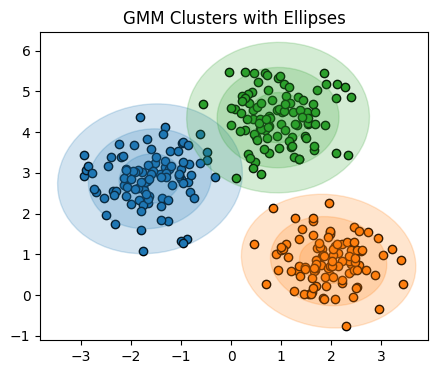

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
labels = gmm.predict(X)


# Function to draw ellipses representing Gaussian components
def draw_ellipse(pos, cov, ax, color):
    U, s, _ = np.linalg.svd(cov)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(pos, 2*nsig*np.sqrt(s[0]), 2*nsig*np.sqrt(s[1]),
                             angle=angle, alpha=0.2, color=color))

# Plot the data and the GMM components
fig, ax = plt.subplots(figsize=(5, 4))
colors = plt.cm.tab10(np.arange(gmm.n_components))
for i, (mean, cov) in enumerate(zip(gmm.means_, gmm.covariances_)):
    ax.scatter(*X[labels==i].T, color=colors[i], edgecolor='k')
    draw_ellipse(mean, cov, ax, colors[i])

plt.title('GMM Clusters with Ellipses')
plt.show()